# Feature Importance
Feature Importance is a technique used in feature selection to determine the relevance or importance of each feature in a machine learning model. It helps to identify the features that contribute the most to the predictive power of the model and can be used to rank or select the most important features.

Feature Importance is often calculated based on the concept of how much a feature contributes to the reduction in the model's error or impurity. The specific method for calculating feature importance depends on the type of model used. Here are a few common techniques for calculating feature importance:

- Decision Tree-based Feature Importance
- Coefficient Magnitude (Linear Models)
- Permutation Importance
- Recursive Feature Elimination (RFE)
- LASSO Regularization (L1 Penalty)

The feature importance scores obtained from these techniques provide a ranking or measure of the relative importance of each feature in the context of the specific model or problem. Based on these scores, features can be selected by setting a threshold or selecting the top-k most important features.

Feature Importance is a valuable tool in feature selection as it allows for the identification and focus on the most informative features, which can lead to improved model performance, reduced dimensionality, and increased interpretability.

In [7]:
import warnings as wr
wr.filterwarnings('ignore')

import pandas as pd
df = pd.read_csv('Datasets\mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
X = df.iloc[:, :-1]
y = df[['price_range']]

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [8]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [9]:
print(model.feature_importances_)

[0.06236207 0.0205468  0.0334456  0.0199164  0.03164905 0.01676029
 0.03561033 0.03377937 0.03649913 0.03248937 0.0328677  0.04703014
 0.04896366 0.39301655 0.03413895 0.03389411 0.03506001 0.01393622
 0.01805202 0.01998222]


In [12]:
ranked_features = pd.Series(model.feature_importances_, index = X.columns)

In [13]:
ranked_features.nlargest(10)

ram              0.393017
battery_power    0.062362
px_width         0.048964
px_height        0.047030
mobile_wt        0.036499
int_memory       0.035610
talk_time        0.035060
sc_h             0.034139
sc_w             0.033894
m_dep            0.033779
dtype: float64

<Axes: >

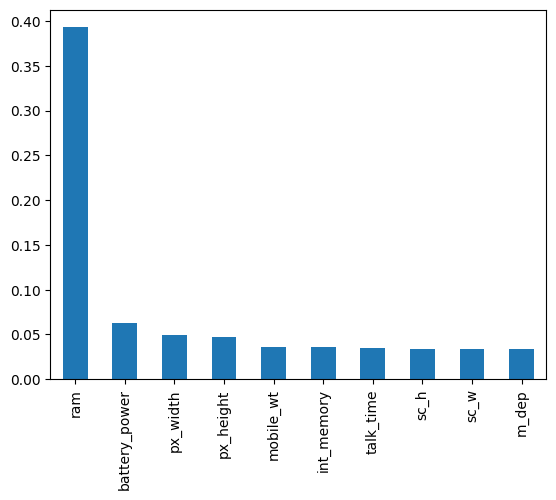

In [14]:
ranked_features.nlargest(10).plot.bar()